<a href="https://colab.research.google.com/github/anubrata01/Data-mining-college-Assignment/blob/main/Haberman%E2%80%99s_Survival_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset: Haberman’s Survival Dataset(Survival of paitient who had undergone surgery fro breast cancer)**


[The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.]

**Understanding of the dataset.**

In [ ]:
import pandas as pd # pandas library will be used to read csv fies.
data = pd.read_csv("/content/drive/MyDrive/dataset/haberman.csv") # import dataset
data.head(100)


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
95,47,63,23,2
96,47,62,0,2
97,47,65,0,2
98,47,61,0,1


As we see the column contains Number instead of Column name, So we replace those column with proper column names.

In [ ]:
data.rename(columns={'30':'Age','64':'Op_Year','1':'axil_nodes','1.1':'Surv_status_5_years'},inplace=True) # Inplace = True means change in the acctual dataset.
data.head()

,Age,Op_Year,axil_nodes,Surv_status_5_years
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


2. Find the tota number of Records.

In [ ]:
print(data.shape)

(305, 4)


So we see the the dataset contains 4 columns and 305 records.

3. find attributes and type of attributes present in the dataset.

In [ ]:
print(f"Number of attributes:{data.shape[1]}")

Number of attributes:4


In [ ]:
print(f"All the datatypes:\n{data.dtypes}")

All the datatypes:
Age                    int64
Op_Year                int64
axil_nodes             int64
Surv_status_5_years    int64
dtype: object


So we can see we only have numarical data with is integers.

We can do all of these by just one method. ".info()". This will gives every details about the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  305 non-null    int64
 1   Op_Year              305 non-null    int64
 2   axil_nodes           305 non-null    int64
 3   Surv_status_5_years  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


4. Identify and print catagorical and numerical.

In [ ]:
# Initialize empty array.
catagorical = []
numerical = []

In [ ]:
for i in data.columns:
  if data[i].dtypes == "object": # Objects are considerd as catagorical . catagorical type are always discreate value.
    catagorical.append(i)
  elif data[i].dtypes == "int64": # Numerical can be discreate or contineous.
    numerical.append(i)
print(f"Catagorical:{catagorical}\nNumberical:{numerical}")

Catagorical:[]
Numberical:['Age', 'Op_Year', 'axil_nodes', 'Surv_status_5_years']


We see there is no catagorical data s we discuss before.

5. Find the unique values.

In [ ]:
data.nunique() # To see how many unique value is there for every attributes.

,0
Age,49
Op_Year,12
axil_nodes,31
Surv_status_5_years,2


There is too many unique values for Age and axil_nodes. So we will only see unique values for Op_Year and Surv_status

In [ ]:
data["Op_Year"].unique()

array([62, 65, 59, 58, 60, 66, 61, 67, 64, 63, 69, 68])

In [ ]:
data["Surv_status_5_years"].unique()

array([1, 2])

Survival status (class attribute)<br>
1 = the patient survived 5 years or longer<br>
2 = the patient died within 5 year

6. find the range of values for numerical variables preset in thr dataset.


In [ ]:
data["Surv_status_5_years"].value_counts()

,count
Surv_status_5_years,
1,224
2,81


There is huge differnece between died and survived these may cause overfitting and can be more biased towards surviving.
<br>


---



***We can solve this by resampling methods.***

In [ ]:
print(f"Range of the age is from {data['Age'].min()} to {data['Age'].max()}")

Range of the age is from 30 to 83


In [ ]:
print(f"Range of the Op_Year is from {data['Op_Year'].min()} to {data['Op_Year'].max()}.")

Range of the Op_Year is from 58 to 69.


In [ ]:
print(f"Range of the axil_nodes is from {data['axil_nodes'].min()} to {data['axil_nodes'].max()}.")

Range of the axil_nodes is from 0 to 52.


In [ ]:
print(f"Range of the Surv_status_5_years is from {data['Surv_status_5_years'].min()} to {data['Surv_status_5_years'].max()}.")

Range of the Surv_status_5_years is from 1 to 2.


# B. Data pre-processing

1.First let's check NULL values.

In [ ]:
data.isnull().sum() # This will show if there is null value in any attributes

,0
Age,0
Op_Year,0
axil_nodes,0
Surv_status_5_years,0


So clearly this dataset does not contains any null value. So we don't have to replace missing value. In case of missing value we will replace these missing values with relevent values. If we do not replace missing value or null value it might cause bad model training.

2.Scale numeric variables into specified range. (either z score normalization or min-max normalization)
<br> This will help to create more accurate model.

The dataset is in correct form so we don't have to do any trasformation on the dataset. We can proceed to **Understanding of the data**

# Understanding of the data

1. Use bar chart to see relevency

In [ ]:
# import matplotlib to show visualization
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

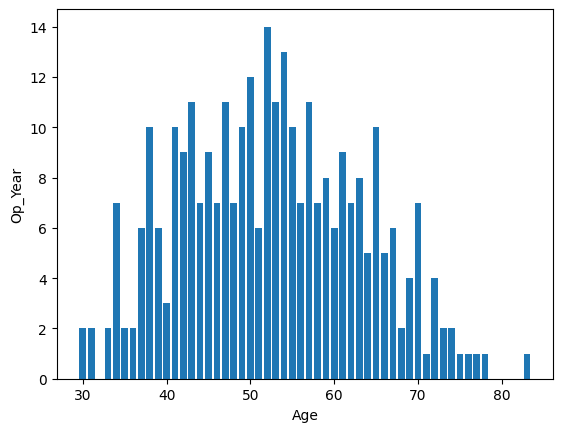

In [ ]:
counter = Counter(data["Age"])
plt.bar(data["Age"].unique(),counter.values())
plt.xlabel("Age")
plt.ylabel("Op_Year")
plt.show()

2. pie chart to visualize number of Surv_status_5_years

<class 'dict'>


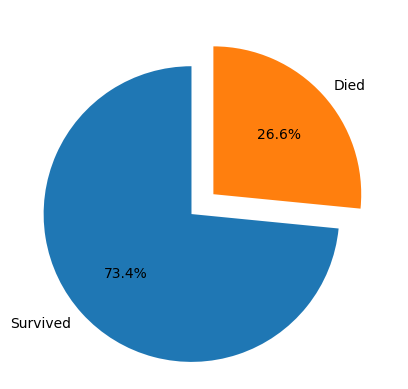

In [ ]:
label = {1: "Survived", 2: "Died"}
print(type(label))
# Map unique values to the corresponding labels
labels = [label[val] for val in data["Surv_status_5_years"].unique()]
# Create pie chart
plt.pie(data["Surv_status_5_years"].value_counts(), labels=labels, startangle=90, explode=(0.2, 0),autopct="%1.1f%%")
plt.show()


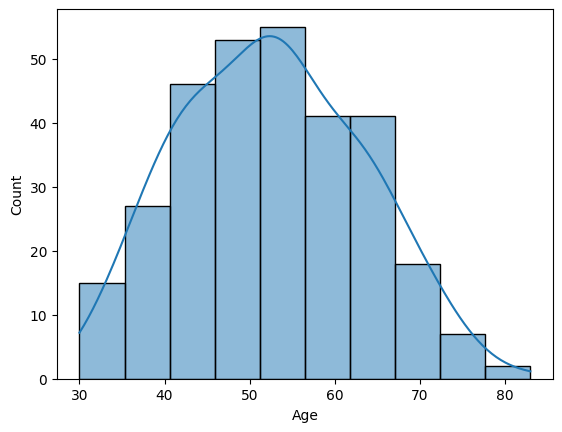

In [ ]:
sns.histplot(data["Age"],kde=True,bins=10)
plt.show()

So from this Histogram we can observed from age 40-70 are most frequent.

3. Use bar chart to see relation between age and Surv_status_5_years

Before we do any group by , we will create an other column for better understanding

In [ ]:
bins = [20,30,40,50,60,70,80,90]
labels = ["20-30","30-40","40-50","50-60","60-70","70-80","80-90"]
data["Age_group"] = pd.cut(data["Age"],bins=bins,labels=labels) # pd.cut
data.head()

,Age,Op_Year,axil_nodes,Surv_status_5_years,Age_group
0,30,62,3,1,20-30
1,30,65,0,1,20-30
2,31,59,2,1,30-40
3,31,65,4,1,30-40
4,33,58,10,1,30-40


So this will help me to visualize based on age group.

<ipython-input-22-bdc1a55e2459>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = data.groupby("Age_group")["Surv_status_5_years"].value_counts().unstack()


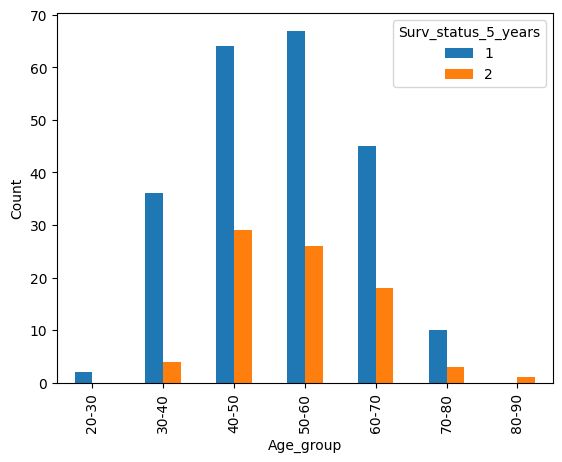

In [ ]:
age_group = data.groupby("Age_group")["Surv_status_5_years"].value_counts().unstack()
age_group.plot(kind="bar" )
plt.xlabel("Age_group")
plt.ylabel("Count")
plt.show()

Death to survive ratio:


In [ ]:
age_group.rename(columns = {1:"Survived",2:"Died"},inplace = True)

In [ ]:
age_group["Survived_percentage"]= (age_group["Survived"]/(age_group["Survived"]+age_group["Died"]))*100
age_group["Died_percentage"]= (age_group["Died"]/(age_group["Survived"]+age_group["Died"]))*100

Surv_status_5_years,Survived,Died,Survived_percentage,Died_percentage
Age_group,,,,
20-30,2,0,100.00,0.00
30-40,36,4,90.00,10.00
40-50,64,29,68.82,31.18
50-60,67,26,72.04,27.96
60-70,45,18,71.43,28.57
70-80,10,3,76.92,23.08
80-90,0,1,0.00,100.00


In [ ]:
age_group[["Survived_percentage","Died_percentage"]].round(1)

Surv_status_5_years,Survived_percentage,Died_percentage
Age_group,,
20-30,100.0,0.0
30-40,90.0,10.0
40-50,68.8,31.2
50-60,72.0,28.0
60-70,71.4,28.6
70-80,76.9,23.1
80-90,0.0,100.0


1.From the above table we can observe that age group 30-40 and 70-80 Survived the most.<br>2. people haven't survived who's age is more than 80 <br> 3. people didn't die who's age is less than 30.

Let's train out model
<br>
Train & test

In [ ]:
new_df = data.drop(columns = ["Age_group","Surv_status_5_years"])
new_df.head()
out_df = data["Surv_status_5_years"]
out_df.head()

,Surv_status_5_years
0,1
1,1
2,1
3,1
4,1


split into train and test in a 8:2 ratio

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(new_df,out_df,test_size=0.2) # 0.2 means 80% data will be used for training the model.

Next step train the model using K-NN (KNeighbours)

In [ ]:
x_test.head()

,Age,Op_Year,axil_nodes
154,52,68,0
51,41,65,0
273,67,63,1
156,53,65,1
292,72,63,0


In [ ]:
x_test

,Age,Op_Year,axil_nodes
154,52,68,0
51,41,65,0
273,67,63,1
156,53,65,1
292,72,63,0
...,...,...,...
240,62,62,6
124,50,64,0
189,56,65,9
150,52,62,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Accuracy for k = 1 is 0.6721311475409836
Accuracy for k = 2 is 0.7704918032786885
Accuracy for k = 3 is 0.7704918032786885
Accuracy for k = 4 is 0.7704918032786885
Accuracy for k = 5 is 0.7704918032786885
Accuracy for k = 6 is 0.7704918032786885
Accuracy for k = 7 is 0.7868852459016393
Accuracy for k = 8 is 0.7868852459016393
Accuracy for k = 9 is 0.8032786885245902
Accuracy for k = 10 is 0.8032786885245902
Accuracy for k = 11 is 0.8032786885245902
Accuracy for k = 12 is 0.8032786885245902
Accuracy for k = 13 is 0.8032786885245902
Accuracy for k = 14 is 0.8032786885245902
Accuracy for k = 15 is 0.8032786885245902
Accuracy for k = 16 is 0.8032786885245902
Accuracy for k = 17 is 0.8032786885245902
Accuracy for k = 18 is 0.819672131147541
Accuracy for k = 19 is 0.8360655737704918
Accuracy for k = 20 is 0.8360655737704918
Accuracy for k = 21 is 0.8360655737704918
Accuracy for k = 22 is 0.8360655737704918
Accuracy for k = 23 is 0.8360655737704918
Accuracy for k = 24 is 0.8360655737704918


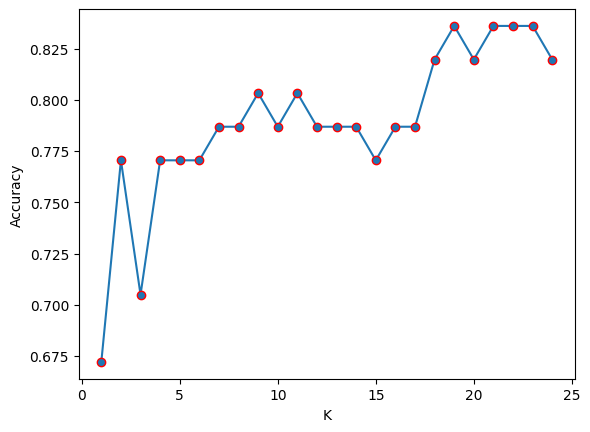

In [ ]:
max=0
x=[]
y=[]
for i in range (1,25):
  x.append(i)
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  y.append(accuracy)
  if max< accuracy:
    max = accuracy
  print(f"Accuracy for k = {i} is {max}")
plt.plot(x,y,marker = "o",mec="red")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy is {round(accuracy*100,2)}")
# misclassification
misclassification = 1 - accuracy
print(f"Misclassification is {round(misclassification*100,2)}")

Accuracy is 78.69
Misclassification is 21.31


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[44  3]
 [10  4]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.81      0.94      0.87        47
           2       0.57      0.29      0.38        14

    accuracy                           0.79        61
   macro avg       0.69      0.61      0.63        61
weighted avg       0.76      0.79      0.76        61



Due to less datapoints recall for died is very poor. Hence our model will be more biased towards surviving as we discuss earlier.

# Couple of way we can fix it.

1.   Resampling Techniques
2.   Model Tuning



In [ ]:
# new data point
new = pd.DataFrame({'Age': [67], 'Op_Year': [63], 'axil_nodes': [1]})
y_pred = knn.predict(new)
print("Survived" if y_pred == 1 else "Died")

Survived


In [ ]:
from imblearn.combine import SMOTEENN
from collections import Counter

# Assume X_train and y_train are your features and target variables
print("Before resampling:", Counter(y_train))

# Applying both oversampling and undersampling (SMOTE + ENN)
smote_enn = SMOTEENN(random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(x_train, y_train)

print("After resampling:", Counter(y_resampled))


Before resampling: Counter({1: 177, 2: 67})
After resampling: Counter({2: 103, 1: 84})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_resampled,y_resampled)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy is {round(accuracy*100,2)}")
# misclassification
misclassification = 1 - accuracy
print(f"Misclassification is {round(misclassification*100,2)}")


Accuracy is 57.38
Misclassification is 42.62


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.78      0.62      0.69        47
           2       0.25      0.43      0.32        14

    accuracy                           0.57        61
   macro avg       0.52      0.52      0.50        61
weighted avg       0.66      0.57      0.60        61



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Assume X_train and y_train are your features and target variables
print("Before resampling:", Counter(y_train))

# Applying Random Under-sampling
under_sampler = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = under_sampler.fit_resample(x_train, y_train)

print("After resampling:", Counter(y_resampled))


Before resampling: Counter({1: 177, 2: 67})
After resampling: Counter({1: 67, 2: 67})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_resampled,y_resampled)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy is {round(accuracy*100,2)}")
# misclassification
misclassification = 1 - accuracy
print(f"Misclassification is {round(misclassification*100,2)}")

Accuracy is 67.21
Misclassification is 32.79


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.81      0.74      0.78        47
           2       0.33      0.43      0.38        14

    accuracy                           0.67        61
   macro avg       0.57      0.59      0.58        61
weighted avg       0.70      0.67      0.69        61



In [ ]:
# new data point
new = pd.DataFrame({'Age': [0], 'Op_Year': [0], 'axil_nodes': [0]})
y_pred = knn.predict(new)
print("Survived" if y_pred == 1 else "Died")

Survived
